# Using linear regression to model OLED


1- Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

import data

In [2]:
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='Sheet3')
df = df.fillna(value=0)
X = df[list(df.columns)[:-4]]
y = df.iloc[:, -1:]

#display data 
X.head()

,lumo_1,homo_1,t1,lumo_2,homo_2,t2,lumo_3,homo_3,t3,LUMO,...,t4,lumo5,homo5,t5,lumo6,homo6,t6,wf_1,t7,t8
0,3.3,5.2,60,2.0,5.8,20.0,2.4,5.9,10.0,1.09,...,25.0,2.5,6.8,5.0,2.80,6.20,30.0,3.5,1.5,200
1,5.7,9.5,10,2.0,5.8,40.0,0.0,0.0,0.0,2.02,...,20.0,0.0,0.0,0.0,2.73,6.68,45.0,4.3,2.0,120
2,2.3,5.3,10,2.0,5.6,70.0,0.0,0.0,0.0,2.40,...,20.0,0.0,0.0,0.0,2.73,6.68,45.0,3.5,1.0,100
3,3.3,5.2,40,0.0,0.0,0.0,0.0,0.0,0.0,2.70,...,50.0,0.0,0.0,0.0,0.00,0.00,0.0,4.2,1.0,100
4,3.3,5.2,50,2.7,5.8,5.0,0.0,0.0,0.0,2.02,...,30.0,0.0,0.0,0.0,2.80,6.20,30.0,3.5,1.0,200


In [3]:
y.head()

,cd/a
0,28.24
1,40.80
2,26.30
3,3.38
4,1.00


In [4]:
# preprocess the data and split the data for 
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=278)
# X[:5]

In [5]:
regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

In [6]:
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.488756849655


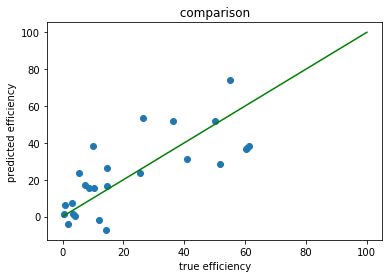

In [7]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

In [8]:
# print predicted value and actual value
y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %s,  Actual: %s' % (prediction, y_test[i]))

Predicted: [ 0.27595328],  Actual: [4.0]
Predicted: [ 74.1212664],  Actual: [55.0]
Predicted: [ 51.74668053],  Actual: [36.3]
Predicted: [ 6.05779334],  Actual: [0.69]
Predicted: [ 16.57048741],  Actual: [14.7]
Predicted: [-1.87341699],  Actual: [12.0]
Predicted: [ 17.09171774],  Actual: [7.4]
Predicted: [ 53.60263596],  Actual: [26.3]
Predicted: [ 1.35794395],  Actual: [0.47]
Predicted: [ 28.47459263],  Actual: [51.8]
Predicted: [ 38.05988798],  Actual: [61.1]
Predicted: [ 7.1562221],  Actual: [3.12]
Predicted: [ 15.31789394],  Actual: [8.7]
Predicted: [ 51.60343217],  Actual: [50.0]
Predicted: [ 30.98901377],  Actual: [40.8]
Predicted: [ 1.62619067],  Actual: [3.38]
Predicted: [-7.22459186],  Actual: [14.4]
Predicted: [ 26.56931297],  Actual: [14.6]
Predicted: [ 38.37393656],  Actual: [10.0]
Predicted: [ 36.84023121],  Actual: [60.3]
Predicted: [-4.20936908],  Actual: [1.87]
Predicted: [ 23.8115423],  Actual: [25.6]
Predicted: [ 23.37736548],  Actual: [5.47]
Predicted: [ 37.40660076]

# Try using regularized model

In [9]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [17]:
regressor = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 40]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

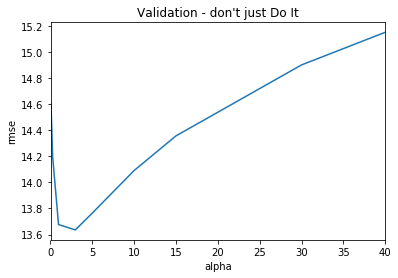

In [18]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - don't just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [12]:
cv_ridge.min()

13.635479146948757

In [13]:
regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.481927465708


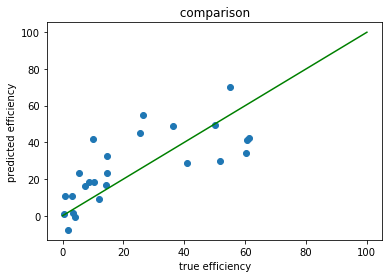

In [14]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()